In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
features_df = pd.read_csv("extracted_features_v0.2.csv", index_col="wav_id")
features_df

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
wav_id,,,,,,,,,,,,,,,,,,,,,
5e258fd1305bcf3ad153a6a4,2.592392e-07,0.0,2.592392e-07,28.0,0.0,3.462342e-08,-2.195436e-10,6.996994e-08,2.206284e-08,1.110736e-15,...,68.076350,8.341203,2.874979,19.054754,-1.162051,0.012518,3.178476,1.174570,3.165958,4.340528
5e258fe2305bcf3ad153a6a5,1.436943e-07,0.0,1.436943e-07,59.0,0.0,2.807357e-08,-8.333632e-11,4.115737e-08,2.135804e-08,8.103691e-16,...,109.559070,10.498592,1.641979,10.047668,-4.297239,0.000000,5.946875,4.297239,5.946875,10.244114
5e258ff5305bcf3ad153a6a6,2.645968e-07,0.0,2.645968e-07,132.0,0.0,2.765471e-08,-2.840646e-11,3.241280e-08,2.263397e-08,1.148836e-15,...,90.338270,9.569824,0.621378,5.098198,-3.372910,0.000000,5.525393,3.372910,5.525393,8.898302
5e25902f305bcf3ad153a6a9,2.422563e-07,0.0,2.422563e-07,127.0,0.0,3.293097e-08,-5.346202e-11,4.132451e-08,2.574871e-08,1.487964e-15,...,75.460280,8.815373,1.018880,6.957049,-2.294756,0.000000,3.532836,2.294756,3.532836,5.827592
5e27ec9f5807b852d9e01542,1.468382e-08,0.0,1.468382e-08,88.0,0.0,1.369371e-09,-9.951729e-13,1.525613e-09,8.970344e-10,2.465537e-18,...,40.283660,6.452733,3.258206,21.836330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5fbe35bfcb503578af9eedb2,1.895298e-08,0.0,1.895298e-08,234.0,0.0,2.598074e-09,4.651532e-12,1.770101e-09,3.285996e-09,1.899025e-17,...,60.866040,7.969856,0.689171,7.423038,-2.370354,0.000000,4.904098,2.370354,4.904098,7.274452
5fbe361844697678c497c07e,2.386504e-08,0.0,2.386504e-08,208.0,0.0,2.633533e-09,-2.896121e-12,3.173659e-09,3.207239e-09,2.101864e-17,...,57.343560,7.641128,2.460242,15.546047,-1.533839,0.000000,2.936110,1.533839,2.936110,4.469948
5fbe364744697678c497c07f,3.677133e-08,0.0,3.677133e-08,165.0,0.0,2.188662e-09,-8.456184e-12,3.981373e-09,2.785248e-09,2.568774e-17,...,49.223145,7.102743,1.334555,10.733874,-2.249493,0.000000,3.623671,2.249493,3.623671,5.873164


In [7]:
labels_df_01 = pd.read_csv("4th.csv", encoding='cp949').set_index("wav_id")
labels_df_02 = pd.read_csv("5th_1st.csv", encoding='cp949').set_index("wav_id")
labels_df_03 = pd.read_csv("5th_2nd.csv", encoding='cp949').set_index("wav_id")
labels_df = pd.concat([labels_df_01, labels_df_02, labels_df_03])
labels_df

,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번 감정세기,5번 감정,5번 감정세기,나이,성별
wav_id,,,,,,,,,,,,,,
5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male
5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male
5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,anger,Angry,1,Angry,1,Neutral,0,Angry,1,Angry,1,27,male
5e25902f305bcf3ad153a6a9,그럼 방세는 어떡해.,anger,Sadness,1,Sadness,1,Sadness,1,Sadness,1,Sadness,1,27,male
5e27f90b5807b852d9e0157b,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,sad,Sadness,1,Sadness,1,Sadness,1,Sadness,2,Sadness,1,32,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5fbe313c44697678c497c05a,나 엘리베이터에 갇혔어.,fear,happiness,1,sadness,1,sadness,2,sadness,1,sadness,1,23,female
5fbe251044697678c497bfb8,하지만 기분이 나쁜 걸 어떡해?,angry,sadness,1,fear,1,sadness,2,sadness,1,neutral,0,23,female
5fbe31584c55eb78bd7cee7f,자취방 엘리베이턴데 정전인가봐.,fear,sadness,1,neutral,0,sadness,2,fear,1,sadness,1,23,female


### 라벨링

데이터 최대 점수는 2*5 = 10
5명의 라벨 합 / 10
-> 모두가 (angry, 2)로 라벨링하면 angry_score=1

In [13]:
def score_emotion(row):
    emotions = ['happiness', 'angry', 'disgust', 'fear', 'neutral', 'sadness', 'surprise']
    scores = dict()
    for emo in emotions:
        scores[emo] = 0
    
    for i in range(1, 6):
        emo = row[f'{i}번 감정'].lower().strip()
        score = row[f'{i}번 감정세기' or f'{i}번감정세기']
        scores[emo] += score / 10
    
    return [scores[e] for e in emotions]

labels_df[["happiness_score", "angry_score", "disgust_score", "fear_score", "neutral_score", "sadness_score", "surprise_score"]] = labels_df.apply(
    lambda row: pd.Series(score_emotion(row)), axis=1
)
labels_df
    
    

,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번 감정세기,...,5번 감정세기,나이,성별,happiness_score,angry_score,disgust_score,fear_score,neutral_score,sadness_score,surprise_score
wav_id,,,,,,,,,,,,,,,,,,,,,
5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,...,1,27,male,0.0,0.2,0.0,0.0,0.0,0.0,0.0
5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,...,1,27,male,0.0,0.2,0.0,0.0,0.0,0.0,0.0
5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,anger,Angry,1,Angry,1,Neutral,0,Angry,1,...,1,27,male,0.0,0.4,0.0,0.0,0.0,0.0,0.0
5e25902f305bcf3ad153a6a9,그럼 방세는 어떡해.,anger,Sadness,1,Sadness,1,Sadness,1,Sadness,1,...,1,27,male,0.0,0.0,0.0,0.0,0.0,0.5,0.0
5e27f90b5807b852d9e0157b,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,sad,Sadness,1,Sadness,1,Sadness,1,Sadness,2,...,1,32,male,0.0,0.0,0.0,0.0,0.0,0.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5fbe313c44697678c497c05a,나 엘리베이터에 갇혔어.,fear,happiness,1,sadness,1,sadness,2,sadness,1,...,1,23,female,0.1,0.0,0.0,0.0,0.0,0.5,0.0
5fbe251044697678c497bfb8,하지만 기분이 나쁜 걸 어떡해?,angry,sadness,1,fear,1,sadness,2,sadness,1,...,0,23,female,0.0,0.0,0.0,0.1,0.0,0.4,0.0
5fbe31584c55eb78bd7cee7f,자취방 엘리베이턴데 정전인가봐.,fear,sadness,1,neutral,0,sadness,2,fear,1,...,1,23,female,0.0,0.0,0.0,0.1,0.0,0.4,0.0


In [14]:
data = features_df.join(labels_df, how='inner')
# data

In [15]:
emotion_cols = [col for col in labels_df.columns if col.endswith('_score')]
emotion_cols

['happiness_score',
 'angry_score',
 'disgust_score',
 'fear_score',
 'neutral_score',
 'sadness_score',
 'surprise_score']

In [16]:
meta_columns = [
    "발화문", "상황", "1번 감정", "1번 감정세기", "2번 감정", "2번 감정세기",
    "3번 감정", "3번 감정세기", "4번 감정", "4번 감정세기", "5번 감정", "5번 감정세기",
    "나이", "성별"
]


In [17]:
X = data.drop(columns=emotion_cols+meta_columns)
y = data[emotion_cols]

def clean_columns(col):
    return col.replace('[', '_').replace(']', '').replace('<', '_')

X.columns = [clean_columns(col) for col in X.columns]
X

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
wav_id,,,,,,,,,,,,,,,,,,,,,
5e258fd1305bcf3ad153a6a4,2.592392e-07,0.0,2.592392e-07,28.0,0.0,3.462342e-08,-2.195436e-10,6.996994e-08,2.206284e-08,1.110736e-15,...,68.076350,8.341203,2.874979,19.054754,-1.162051,0.012518,3.178476,1.174570,3.165958,4.340528
5e258fe2305bcf3ad153a6a5,1.436943e-07,0.0,1.436943e-07,59.0,0.0,2.807357e-08,-8.333632e-11,4.115737e-08,2.135804e-08,8.103691e-16,...,109.559070,10.498592,1.641979,10.047668,-4.297239,0.000000,5.946875,4.297239,5.946875,10.244114
5e258ff5305bcf3ad153a6a6,2.645968e-07,0.0,2.645968e-07,132.0,0.0,2.765471e-08,-2.840646e-11,3.241280e-08,2.263397e-08,1.148836e-15,...,90.338270,9.569824,0.621378,5.098198,-3.372910,0.000000,5.525393,3.372910,5.525393,8.898302
5e25902f305bcf3ad153a6a9,2.422563e-07,0.0,2.422563e-07,127.0,0.0,3.293097e-08,-5.346202e-11,4.132451e-08,2.574871e-08,1.487964e-15,...,75.460280,8.815373,1.018880,6.957049,-2.294756,0.000000,3.532836,2.294756,3.532836,5.827592
5e27ec9f5807b852d9e01542,1.468382e-08,0.0,1.468382e-08,88.0,0.0,1.369371e-09,-9.951729e-13,1.525613e-09,8.970344e-10,2.465537e-18,...,40.283660,6.452733,3.258206,21.836330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5fbe35bfcb503578af9eedb2,1.895298e-08,0.0,1.895298e-08,234.0,0.0,2.598074e-09,4.651532e-12,1.770101e-09,3.285996e-09,1.899025e-17,...,60.866040,7.969856,0.689171,7.423038,-2.370354,0.000000,4.904098,2.370354,4.904098,7.274452
5fbe361844697678c497c07e,2.386504e-08,0.0,2.386504e-08,208.0,0.0,2.633533e-09,-2.896121e-12,3.173659e-09,3.207239e-09,2.101864e-17,...,57.343560,7.641128,2.460242,15.546047,-1.533839,0.000000,2.936110,1.533839,2.936110,4.469948
5fbe364744697678c497c07f,3.677133e-08,0.0,3.677133e-08,165.0,0.0,2.188662e-09,-8.456184e-12,3.981373e-09,2.785248e-09,2.568774e-17,...,49.223145,7.102743,1.334555,10.733874,-2.249493,0.000000,3.623671,2.249493,3.623671,5.873164


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
y_train

,happiness_score,angry_score,disgust_score,fear_score,neutral_score,sadness_score,surprise_score
wav_id,,,,,,,
5e377cf47995ef170fc0ef07,0.0,0.0,0.0,0.0,0.0,0.8,0.0
5eceb2279aa8ea0eec53ef77,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5e37a91905fef317e874be31,0.0,0.6,0.0,0.0,0.0,0.2,0.0
5f007caf704f492ee125615f,0.0,0.0,0.0,0.0,0.0,0.6,0.0
5fbb3285576e9378b67ac9c8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
5e37d000c8c25f16cd1456e6,0.0,0.0,0.0,0.0,0.0,0.7,0.0
5e44e0e0f2fe7a3b1d5446de,0.0,0.6,0.0,0.0,0.0,0.0,0.0
5fb88d7fcb503578af9edb92,0.1,0.0,0.0,0.0,0.0,0.0,0.2


In [20]:
models = {}
for emo in y.columns:
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
    model.fit(X_test, y_test[emo])
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test[emo], y_pred)
    print(f"{emo:<20} MSE: {mse:.4f}")
    models[emo] = model

happiness_score      MSE: 0.0067
angry_score          MSE: 0.0180
disgust_score        MSE: 0.0070
fear_score           MSE: 0.0068
neutral_score        MSE: 0.0000
sadness_score        MSE: 0.0249
surprise_score       MSE: 0.0017


In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np

for emo in y.columns:
    y_true = y_test[emo]
    y_pred = models[emo].predict(X_test)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{emo:<20} | MSE: {mse:.4f} | RMSE: {rmse:.4f}")


happiness_score      | MSE: 0.0067 | RMSE: 0.0817
angry_score          | MSE: 0.0180 | RMSE: 0.1343
disgust_score        | MSE: 0.0070 | RMSE: 0.0839
fear_score           | MSE: 0.0068 | RMSE: 0.0823
neutral_score        | MSE: 0.0000 | RMSE: 0.0000
sadness_score        | MSE: 0.0249 | RMSE: 0.1579
surprise_score       | MSE: 0.0017 | RMSE: 0.0412


In [29]:
# 감정별 예측값 DataFrame
pred_df = pd.DataFrame({emo: models[emo].predict(X_test) for emo in y.columns}, index=X_test.index)

# 실제 값과 비교
comparison = pd.concat([y_test, pred_df], axis=1, keys=["Actual", "Predicted"])

# 예시 출력
pd.set_option('display.max_columns', None)
print(comparison.head())


                                  Actual                                       \
                         happiness_score angry_score disgust_score fear_score   
wav_id                                                                          
5e339cd55807b852d9e04f9a             0.0         0.6           0.0        0.0   
5f92d1349e04b149046cdd71             0.6         0.0           0.0        0.0   
5ecf20eb9aa8ea0eec53f000             0.0         0.0           0.0        0.0   
5f677d6fd338b948c4e682b2             0.4         0.0           0.0        0.0   
5f5d617d2e23c7161accd093             0.0         0.5           0.0        0.0   

                                                                     \
                         neutral_score sadness_score surprise_score   
wav_id                                                                
5e339cd55807b852d9e04f9a           0.0           0.0            0.0   
5f92d1349e04b149046cdd71           0.0           0.0            0.0

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SY

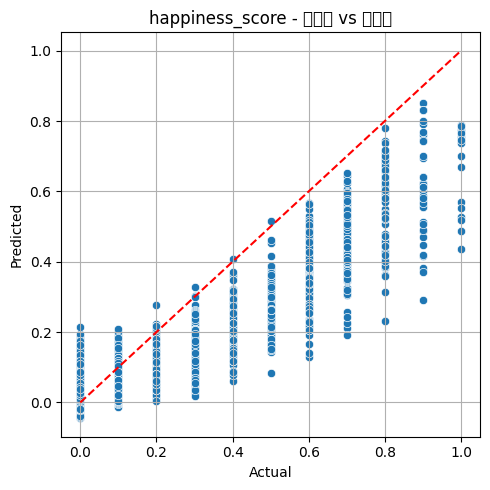

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SY

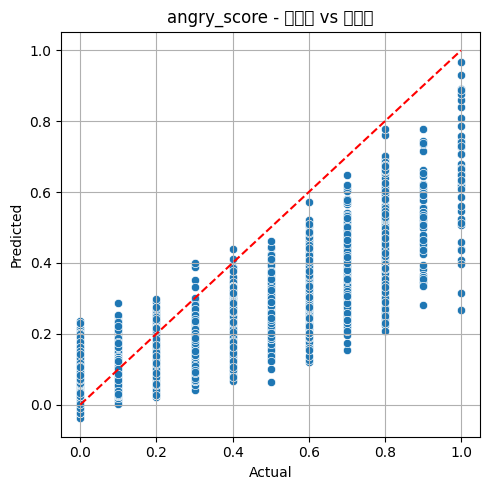

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SY

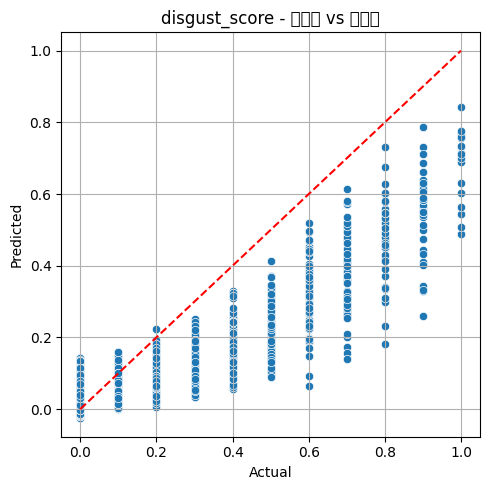

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SY

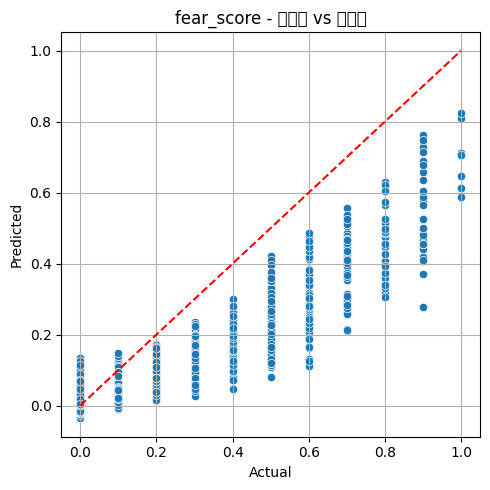

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SY

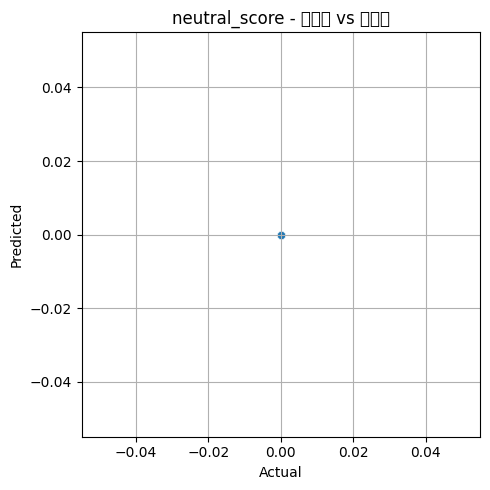

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SY

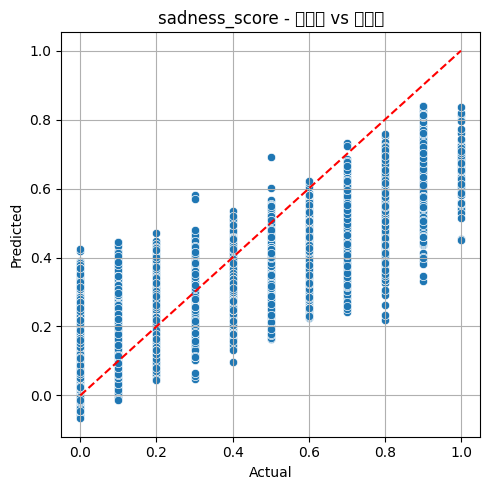

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\1388030420.py:12: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SY

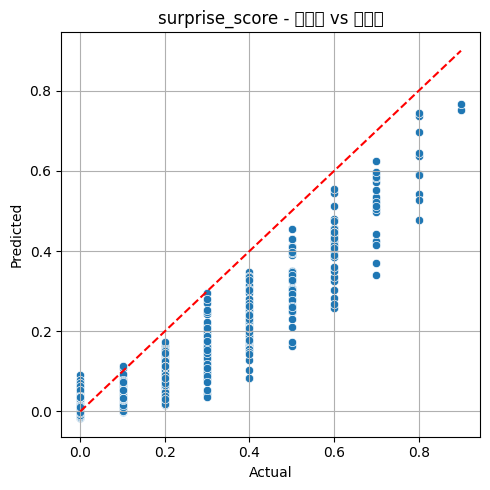

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

for emo in y.columns:
    plt.figure(figsize=(5, 5))
    sns.scatterplot(x=y_test[emo], y=pred_df[emo])
    plt.plot([0, y_test[emo].max()], [0, y_test[emo].max()], '--r')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{emo} - 실제값 vs 예측값")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [25]:
print(y_train.describe())


       happiness_score   angry_score  disgust_score    fear_score  \
count     35180.000000  35180.000000   35180.000000  35180.000000   
mean          0.058511      0.116723       0.048451      0.048240   
std           0.160916      0.216053       0.140452      0.140524   
min           0.000000      0.000000       0.000000      0.000000   
25%           0.000000      0.000000       0.000000      0.000000   
50%           0.000000      0.000000       0.000000      0.000000   
75%           0.000000      0.100000       0.000000      0.000000   
max           1.000000      1.000000       1.000000      1.000000   

       neutral_score  sadness_score  surprise_score  
count        35180.0   35180.000000    35180.000000  
mean             0.0       0.256669        0.019943  
std              0.0       0.271347        0.083923  
min              0.0       0.000000        0.000000  
25%              0.0       0.000000        0.000000  
50%              0.0       0.200000        0.000000  


In [30]:
models = {}
for emo in y.columns:
    # model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
    model = XGBRegressor(
        n_estimators=400,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9
    )
    model.fit(X_test, y_test[emo])
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test[emo], y_pred)
    print(f"{emo:<20} MSE: {mse:.4f}")
    models[emo] = model

happiness_score      MSE: 0.0010
angry_score          MSE: 0.0031
disgust_score        MSE: 0.0012
fear_score           MSE: 0.0010
neutral_score        MSE: 0.0000
sadness_score        MSE: 0.0039
surprise_score       MSE: 0.0003


In [31]:
pred_df = pd.DataFrame({emo: models[emo].predict(X_test) for emo in y.columns}, index=X_test.index)

comparison = pd.concat([y_test, pred_df], axis=1, keys=["Actual", "Predicted"])

pd.set_option('display.max_columns', None)
print(comparison.head())


                                  Actual                                       \
                         happiness_score angry_score disgust_score fear_score   
wav_id                                                                          
5e339cd55807b852d9e04f9a             0.0         0.6           0.0        0.0   
5f92d1349e04b149046cdd71             0.6         0.0           0.0        0.0   
5ecf20eb9aa8ea0eec53f000             0.0         0.0           0.0        0.0   
5f677d6fd338b948c4e682b2             0.4         0.0           0.0        0.0   
5f5d617d2e23c7161accd093             0.0         0.5           0.0        0.0   

                                                                     \
                         neutral_score sadness_score surprise_score   
wav_id                                                                
5e339cd55807b852d9e04f9a           0.0           0.0            0.0   
5f92d1349e04b149046cdd71           0.0           0.0            0.0

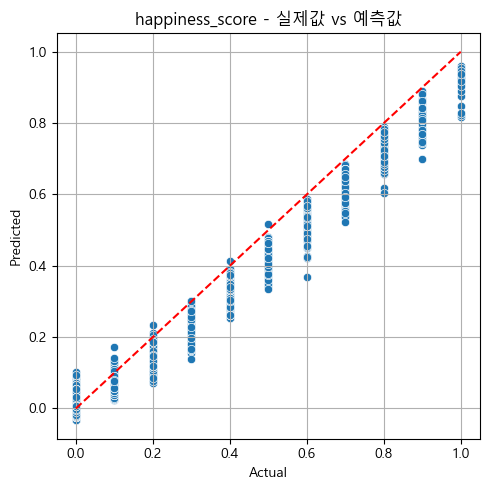

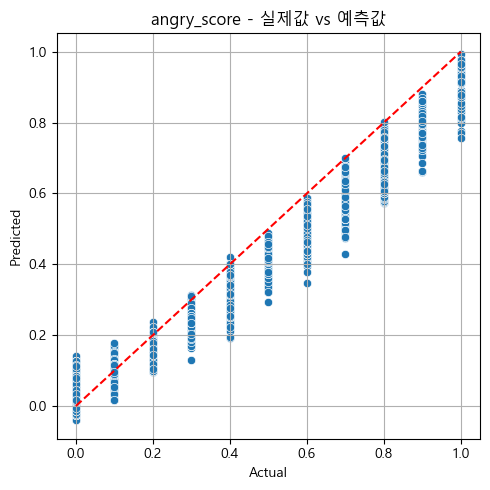

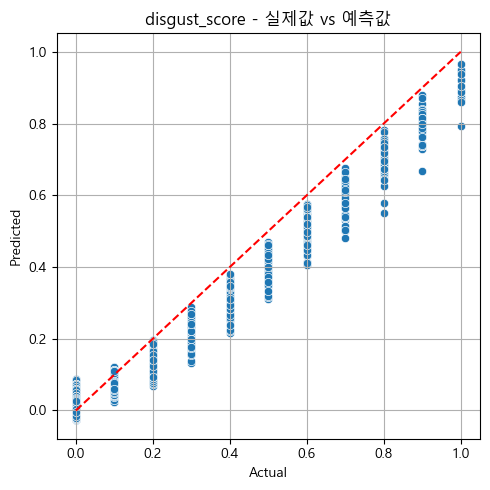

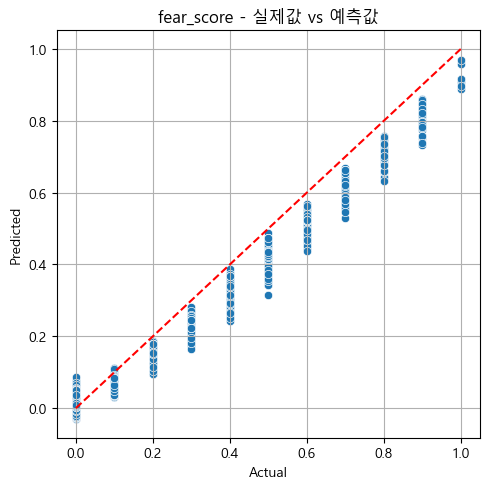

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\885414761.py:10: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


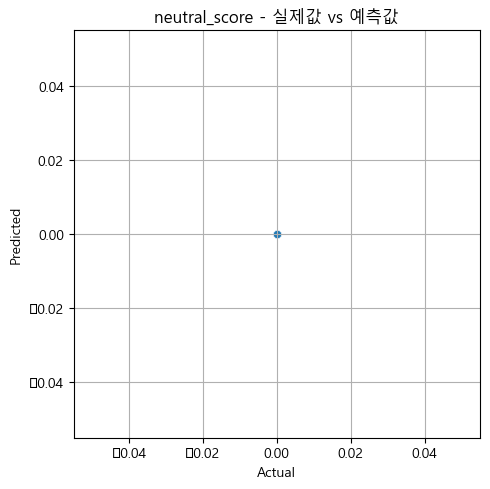

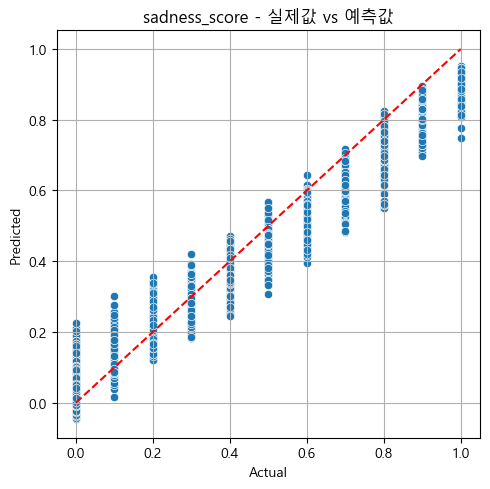

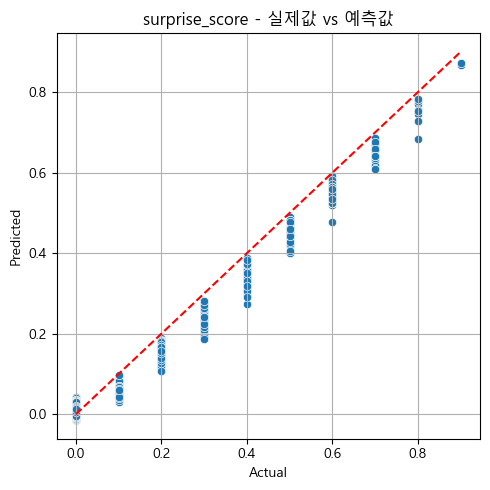

In [33]:
for emo in y.columns:
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.figure(figsize=(5, 5))
    sns.scatterplot(x=y_test[emo], y=pred_df[emo])
    plt.plot([0, y_test[emo].max()], [0, y_test[emo].max()], '--r')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{emo} - 실제값 vs 예측값")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y["fear_score"], cv=5, scoring='neg_mean_squared_error')
print("Cross-validation 평균 MSE:", -scores.mean())


Cross-validation 평균 MSE: 0.0190738238865854


In [39]:
from sklearn.metrics import r2_score
for emo in emotion_cols:
    print(f'{emo:<20} R²: {r2_score(y_test[emo], y_pred):>.4f}')



happiness_score      R²: -0.2519
angry_score          R²: -0.3873
disgust_score        R²: -0.3214
fear_score           R²: -0.2738
neutral_score        R²: 0.0000
sadness_score        R²: -0.8884
surprise_score       R²: 0.9634


중요한 피처 100개만 재학습습

In [58]:
importances = model.feature_importances_
top_k = 100
top_idx = np.argsort(importances)[-top_k:]
X_selected = X.iloc[:, top_idx]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
X_scaled = pd.DataFrame(X_scaled, columns=X_selected.columns, index=X_selected.index)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

models = {}
for emo in y.columns:
    # model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
    model = XGBRegressor(
        n_estimators=400,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9
    )
    model.fit(X_test, y_test[emo])
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test[emo], y_pred)
    print(f"{emo:<20} MSE: {mse:.4f}")
    models[emo] = model

happiness_score      MSE: 0.0031
angry_score          MSE: 0.0082
disgust_score        MSE: 0.0029
fear_score           MSE: 0.0028
neutral_score        MSE: 0.0000
sadness_score        MSE: 0.0123
surprise_score       MSE: 0.0007


In [60]:
pred_df = pd.DataFrame({emo: models[emo].predict(X_test) for emo in y.columns}, index=X_test.index)

comparison = pd.concat([y_test, pred_df], axis=1, keys=["Actual", "Predicted"])

pd.set_option('display.max_columns', None)
print(comparison.head())

                                  Actual                                       \
                         happiness_score angry_score disgust_score fear_score   
wav_id                                                                          
5e339cd55807b852d9e04f9a             0.0         0.6           0.0        0.0   
5f92d1349e04b149046cdd71             0.6         0.0           0.0        0.0   
5ecf20eb9aa8ea0eec53f000             0.0         0.0           0.0        0.0   
5f677d6fd338b948c4e682b2             0.4         0.0           0.0        0.0   
5f5d617d2e23c7161accd093             0.0         0.5           0.0        0.0   

                                                                     \
                         neutral_score sadness_score surprise_score   
wav_id                                                                
5e339cd55807b852d9e04f9a           0.0           0.0            0.0   
5f92d1349e04b149046cdd71           0.0           0.0            0.0

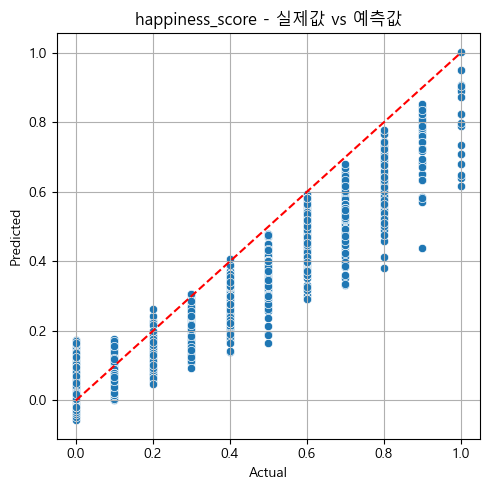

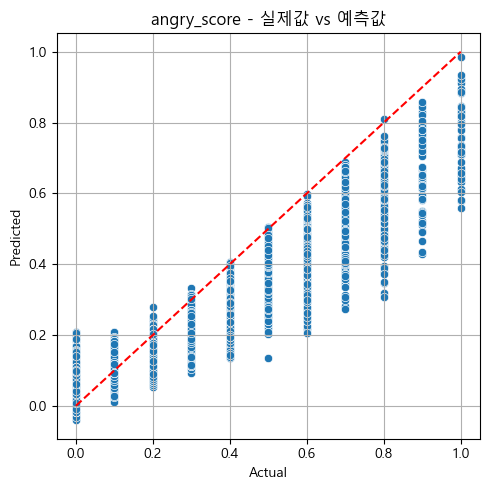

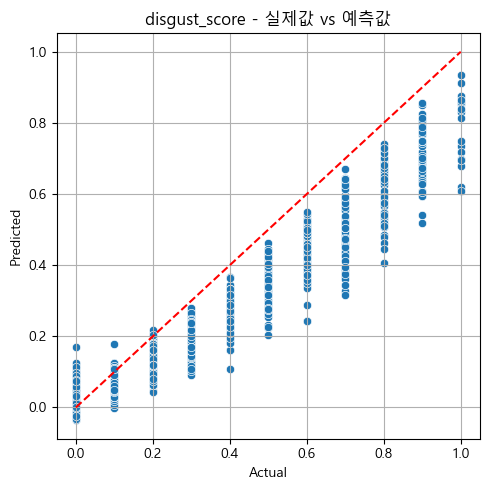

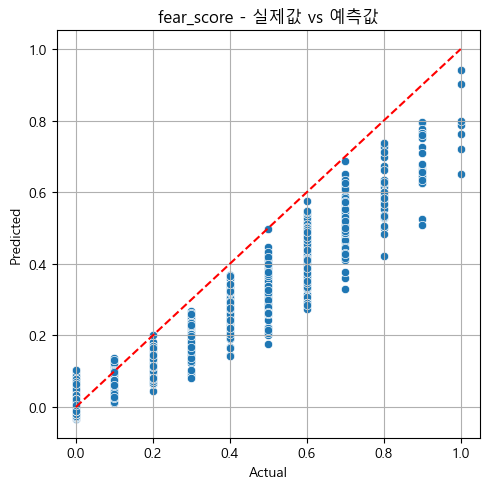

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_11892\885414761.py:10: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


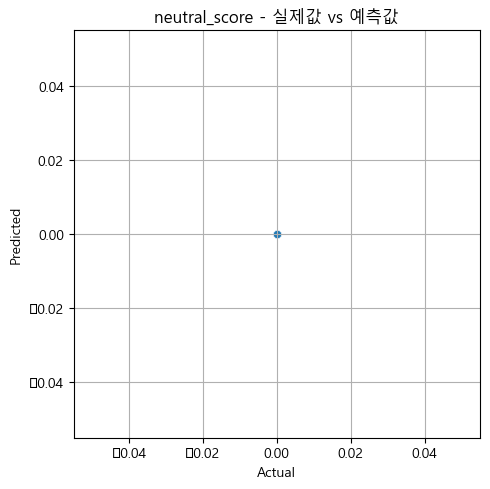

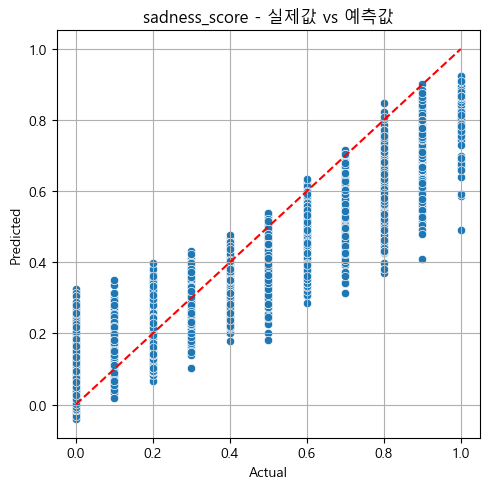

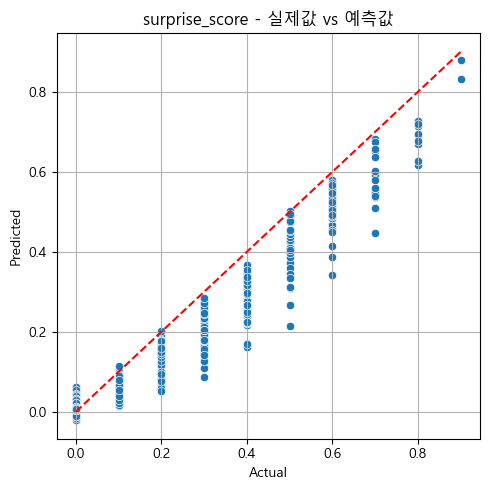

In [64]:
for emo in y.columns:
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.figure(figsize=(5, 5))
    sns.scatterplot(x=y_test[emo], y=pred_df[emo])
    plt.plot([0, y_test[emo].max()], [0, y_test[emo].max()], '--r')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{emo} - 실제값 vs 예측값")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [63]:
from sklearn.metrics import r2_score
for emo in emotion_cols:
    print(f'{emo:<20} R²: {r2_score(y_test[emo], y_pred):>.4f}')


happiness_score      R²: -0.2066
angry_score          R²: -0.3545
disgust_score        R²: -0.2645
fear_score           R²: -0.2206
neutral_score        R²: 0.0000
sadness_score        R²: -0.8592
surprise_score       R²: 0.9021


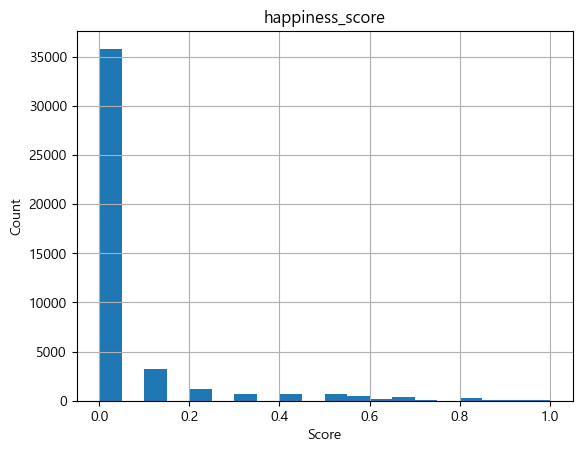

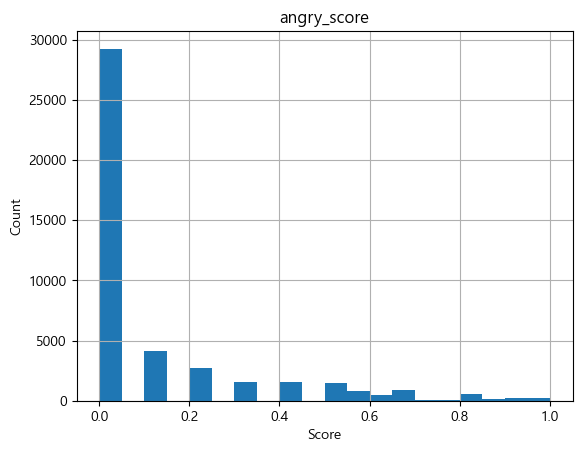

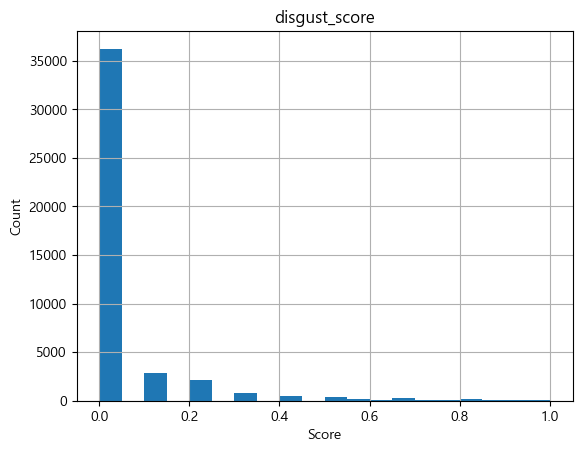

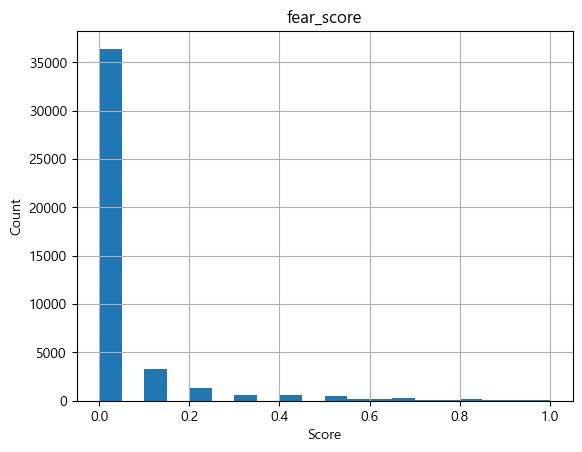

c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


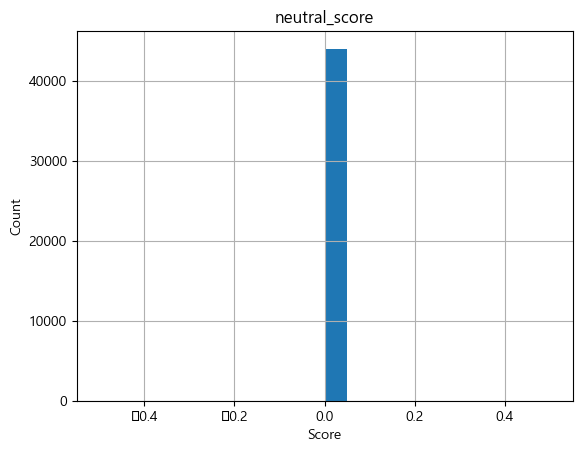

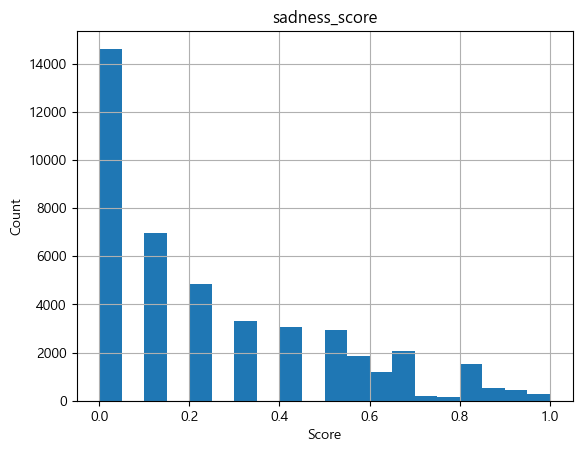

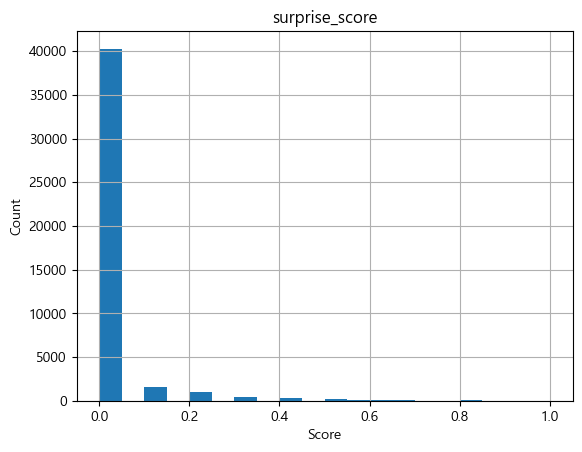

: 

In [ ]:
for emo in y.columns:
    y[emo].hist(bins=20)
    plt.title(emo)
    plt.xlabel("Score")
    plt.ylabel("Count")
    plt.show()
